In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("D:\GitHub\QishiQR")
import Utils.MajorContract_Offsets
import importlib
importlib.reload(Utils.MajorContract_Offsets)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
freq=5
px_th = 0
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [4]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [5]:
#ag
px_th=0
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th0.csv
ag_1612_major_strategy_5_th0.csv
   prior      0      1      2  total signal
0      p  13195  25619  26091  64905      2
1     p0   3419   4904   4871  13194      1
2    p00   1085   1157   1177   3419      2
3   p000    435    341    309   1085      0
4  p0000    224    115     96    435      0


ag_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th0_1.1.csv
ag_major_5_th0_2.1.csv
ag_major_5_th0_3.1.csv
ag_major_5_th0_4.1.csv


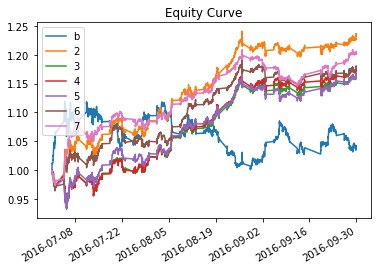

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.205688              0.002838                -0.001505   
1               0.191107              0.002083                -0.001548   
2               0.190257              0.002220                -0.001544   
3               0.199093              0.002085                -0.001546   
4               0.217519              0.002187                -0.001511   
5               0.228345              0.002492                -0.001430   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000842                  0.000064             -0.027593   
1                 0.000828                  0.000048             -0.030408   
2                 0.000830                  0.000050             -0.030408   
3                 0.000835                  0.000049             -0.032980   
4                 0.000888                  0.000051             -0.027381   
5     

In [6]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th0_1.1.csv
ag_major_5_th0_2.1.csv
ag_major_5_th0_3.1.csv
ag_major_5_th0_4.1.csv


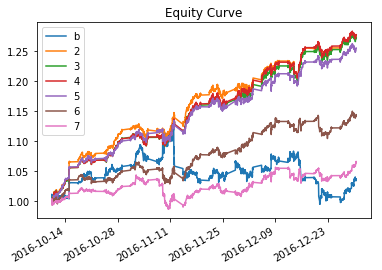

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.176711              0.003448                -0.001295   
1               0.173497              0.003413                -0.001311   
2               0.174861              0.003463                -0.001303   
3               0.164908              0.003218                -0.001319   
4               0.158036              0.001914                -0.001286   
5               0.165868              0.000916                -0.001250   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000718                  0.000079             -0.020967   
1                 0.000717                  0.000080             -0.022298   
2                 0.000719                  0.000080             -0.022443   
3                 0.000721                  0.000076             -0.024782   
4                 0.000751                  0.000045             -0.026163   
5     

In [7]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='LastPrice', px_th=px_th)
lm_validation.run()

# price threshold = 1

In [8]:
freq=5
px_th = 1
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [9]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [10]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th1.csv
ag_1612_major_strategy_5_th1.csv
   prior      0      1      2  total signal
0      p  33893  15342  15670  64905      0
1     p0  20567   6680   6643  33890      0
2    p00  13552   3439   3575  20566      0
3   p000   9375   2060   2116  13551      0
4  p0000   6724   1321   1329   9374      0


ag_major_5_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th1_1.1.csv
ag_major_5_th1_2.1.csv
ag_major_5_th1_3.1.csv
ag_major_5_th1_4.1.csv


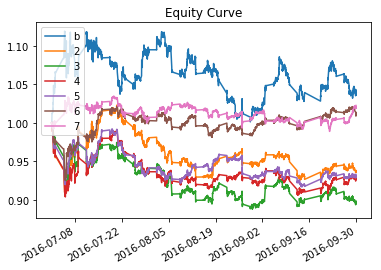

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.235897             -0.000829                -0.004618   
1               0.229114             -0.001378                -0.005955   
2               0.235777             -0.000943                -0.005681   
3               0.241469             -0.000889                -0.004637   
4               0.240527              0.000181                -0.003214   
5               0.230822              0.000318                -0.002500   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002711                 -0.000129             -0.055453   
1                 0.003391                 -0.000322             -0.054805   
2                 0.003477                 -0.000216             -0.055499   
3                 0.003100                 -0.000165             -0.051511   
4                 0.002249                  0.000013             -0.045185   
5     

In [11]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th1_1.1.csv
ag_major_5_th1_2.1.csv
ag_major_5_th1_3.1.csv
ag_major_5_th1_4.1.csv


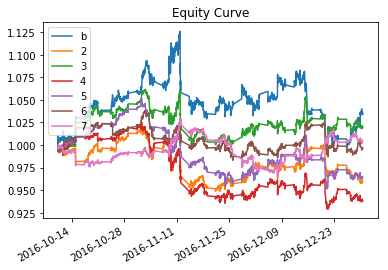

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.168951             -0.000560                -0.003849   
1               0.164017              0.000298                -0.004551   
2               0.167020             -0.000872                -0.004881   
3               0.167399             -0.000484                -0.003987   
4               0.175316             -0.000029                -0.002726   
5               0.181142              0.000080                -0.002310   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002237                 -0.000098             -0.029599   
1                 0.002720                  0.000060             -0.040007   
2                 0.002672                 -0.000215             -0.035441   
3                 0.002545                 -0.000102             -0.030579   
4                 0.002086                 -0.000003             -0.026615   
5     

In [12]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='LastPrice', px_th=px_th)
lm_validation.run()

# price threshold = 2

In [13]:
freq=5
px_th = 2
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [14]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [15]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th2.csv
ag_1612_major_strategy_5_th2.csv
   prior      0     1     2  total signal
0      p  46098  9263  9544  64905      0
1     p0  35736  5197  5157  46090      0
2    p00  28999  3366  3364  35729      0
3   p000  24186  2371  2436  28993      0
4  p0000  20601  1786  1796  24183      0


ag_major_5_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th2_1.1.csv
ag_major_5_th2_2.1.csv
ag_major_5_th2_3.1.csv
ag_major_5_th2_4.1.csv


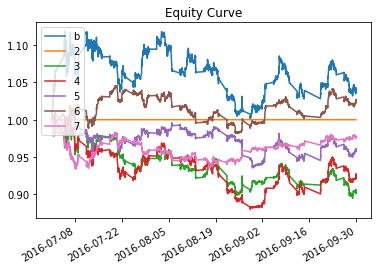

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.228393             -0.001309                -0.011281   
2               0.218490             -0.001005                -0.013333   
3               0.215356             -0.000525                -0.007919   
4               0.234267              0.000376                -0.005604   
5               0.220805             -0.000288                -0.004638   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.008526                 -0.001151             -0.048415   
2                 0.009611                 -0.001377             -0.048986   
3                 0.006793                 -0.000283             -0.052929   
4                 0.004942                  0.000101             -0.050486   
5     

In [16]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th2_1.1.csv
ag_major_5_th2_2.1.csv
ag_major_5_th2_3.1.csv
ag_major_5_th2_4.1.csv


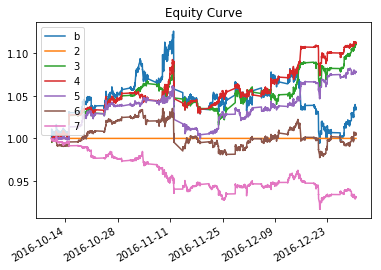

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.174839              0.001513                -0.008383   
2               0.178158              0.001516                -0.010369   
3               0.180244              0.001076                -0.007132   
4               0.175250              0.000079                -0.005148   
5               0.177615             -0.001000                -0.004100   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.007999                  0.001565             -0.038348   
2                 0.009955                  0.002081             -0.045082   
3                 0.006773                  0.000782             -0.050199   
4                 0.004252                  0.000023             -0.031043   
5     

In [17]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='LastPrice', px_th=px_th)
lm_validation.run()

# 2 min freq and price threshold 1

In [18]:
freq=2
px_th = 1
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [19]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [20]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_2_th1.csv
ag_1612_major_strategy_2_th1.csv
   prior      0      1      2  total signal
0      p  43502  10574  10829  64905      0
1     p0  32061   5713   5724  43498      0
2    p00  24888   3599   3571  32058      0
3   p000  20004   2471   2412  24887      0
4  p0000  16461   1783   1760  20004      0


ag_major_2_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th1_1.1.csv


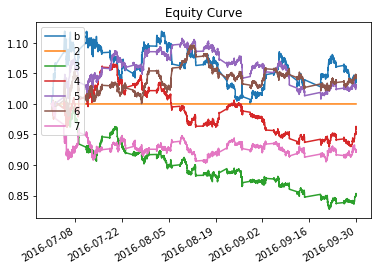

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.197376             -0.002077                -0.009296   
2               0.216395             -0.000451                -0.005960   
3               0.229213              0.000455                -0.004135   
4               0.227035              0.000609                -0.003259   
5               0.201927             -0.001037                -0.002461   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.004916                 -0.001002             -0.042222   
2                 0.003900                 -0.000101             -0.033905   
3                 0.003275                  0.000068             -0.027542   
4                 0.002695                  0.000067             -0.029256   
5     

In [21]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_2_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th1_1.1.csv


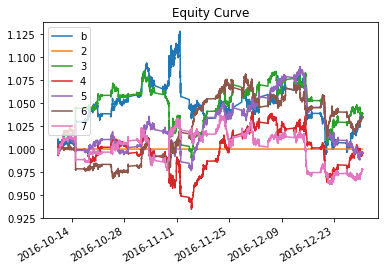

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.181506              0.000569                -0.008136   
2               0.200586             -0.000033                -0.006020   
3               0.191411             -0.000017                -0.004254   
4               0.199109              0.000519                -0.003074   
5               0.181348             -0.000282                -0.002354   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.005827                  0.000347             -0.032863   
2                 0.003797                 -0.000020             -0.036996   
3                 0.003127                 -0.000002             -0.032359   
4                 0.002442                  0.000062             -0.029072   
5     

In [22]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='LastPrice', px_th=px_th)
lm_validation.run()

# 2 min freq and price threshold 0

In [23]:
freq=2
px_th = 0
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [24]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [25]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_2_th0.csv
ag_1612_major_strategy_2_th0.csv
   prior      0      1      2  total signal
0      p  18481  23069  23355  64905      2
1     p0   6650   5931   5899  18480      0
2    p00   2648   2027   1974   6649      0
3   p000   1209    733    706   2648      0
4  p0000    614    307    288   1209      0


ag_major_2_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th0_1.1.csv


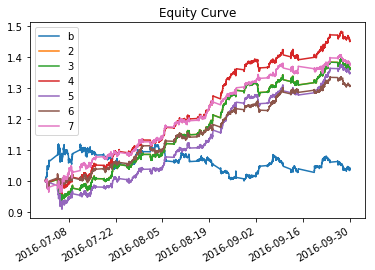

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.219930              0.004147                -0.000990   
1               0.220090              0.004144                -0.000990   
2               0.220111              0.005004                -0.000990   
3               0.230972              0.004013                -0.001004   
4               0.213746              0.003597                -0.000997   
5               0.212099              0.004282                -0.000952   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000548                  0.000041             -0.030091   
1                 0.000548                  0.000041             -0.030091   
2                 0.000550                  0.000046             -0.026707   
3                 0.000546                  0.000038             -0.042817   
4                 0.000588                  0.000035             -0.026707   
5     

In [26]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_2_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th0_1.1.csv


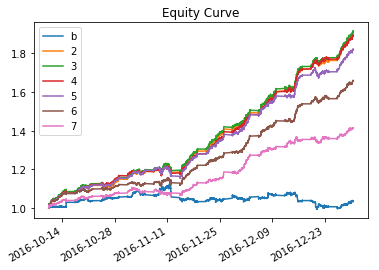

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.192789              0.009065                -0.000812   
1               0.196512              0.009178                -0.000811   
2               0.189571              0.009016                -0.000815   
3               0.200079              0.008473                -0.000828   
4               0.189211              0.007164                -0.000840   
5               0.177760              0.004912                -0.000820   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000504                  0.000091             -0.020421   
1                 0.000505                  0.000092             -0.020421   
2                 0.000502                  0.000085             -0.020421   
3                 0.000503                  0.000081             -0.020421   
4                 0.000537                  0.000071             -0.020663   
5     

In [27]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='LastPrice', px_th=px_th)
lm_validation.run()

# 1 min freq and price threshold 1

In [28]:
freq=1
px_th = 1
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [29]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [30]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_1_th1.csv
ag_1612_major_strategy_1_th1.csv
   prior      0     1     2  total signal
0      p  50147  7332  7426  64905      0
1     p0  41114  4532  4499  50145      0
2    p00  34845  3165  3102  41112      0
3   p000  30195  2368  2280  34843      0
4  p0000  26561  1861  1771  30193      0


ag_major_1_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


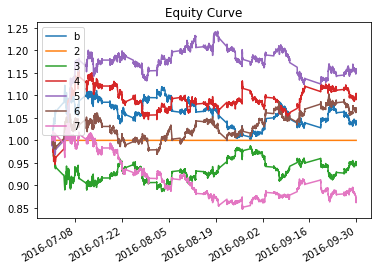

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.217811             -0.000604                -0.045272   
2               0.253555              0.001399                -0.007588   
3               0.242882              0.002024                -0.004964   
4               0.200230              0.000978                -0.002932   
5               0.187035             -0.001855                -0.002607   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.022636             -0.045272   
2                 0.006595                  0.000652             -0.045740   
3                 0.005052                  0.000577             -0.045562   
4                 0.002972                  0.000100             -0.022783   
5     

In [31]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_1_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


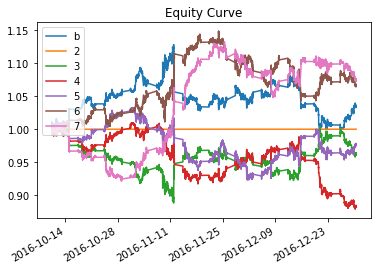

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.182711             -0.000470                -0.033365   
2               0.145208             -0.001685                -0.008135   
3               0.157549             -0.000263                -0.006051   
4               0.170783              0.000975                -0.002981   
5               0.184016              0.001087                -0.002278   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.016683             -0.033365   
2                 0.005091                 -0.001087             -0.041241   
3                 0.004166                 -0.000105             -0.028192   
4                 0.002922                  0.000151             -0.032562   
5     

In [32]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='LastPrice', px_th=px_th)
lm_validation.run()

In [ ]:
1 min freq and price threshold 0

In [33]:
freq=1
px_th = 0
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='LastPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [34]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [35]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_1_th0.csv
ag_1612_major_strategy_1_th0.csv
   prior      0      1      2  total signal
0      p  23412  20669  20824  64905      0
1     p0  10064   6632   6715  23411      0
2    p00   4897   2556   2611  10064      0
3   p000   2647   1100   1150   4897      0
4  p0000   1497    569    581   2647      0


ag_major_1_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


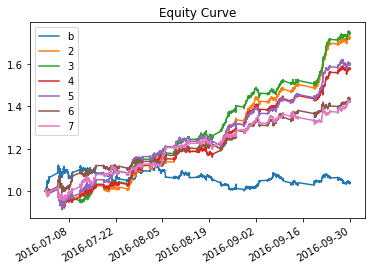

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.242172              0.007354                -0.000742   
1               0.243350              0.007525                -0.000779   
2               0.224465              0.006185                -0.000807   
3               0.229957              0.006364                -0.000828   
4               0.240650              0.004880                -0.000847   
5               0.225670              0.004781                -0.000805   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000408                  0.000040             -0.028114   
1                 0.000436                  0.000045             -0.029434   
2                 0.000455                  0.000040             -0.029434   
3                 0.000468                  0.000043             -0.029434   
4                 0.000511                  0.000035             -0.016754   
5     

In [36]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='LastPrice', px_th=px_th)
lm_validation.run()

ag_major_1_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


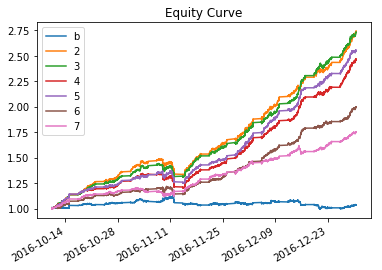

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.235642              0.014239                -0.000612   
1               0.245943              0.014203                -0.000634   
2               0.249331              0.012761                -0.000681   
3               0.248022              0.013248                -0.000704   
4               0.200723              0.009811                -0.000712   
5               0.157654              0.007938                -0.000690   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000391                  0.000079             -0.015963   
1                 0.000422                  0.000088             -0.011754   
2                 0.000437                  0.000087             -0.011987   
3                 0.000451                  0.000096             -0.011754   
4                 0.000489                  0.000074             -0.011751   
5     

In [37]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='LastPrice', px_th=px_th)
lm_validation.run()